# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 9 Minimax and Alpha-Beta Pruning ##

## **Lab tasks & Submission scheme**

**Lab tasks:** \\
In this lab, you are required to implement a game, Simple-Nim, using Minimax and Alpha-Beta Pruning.

 **Submission to ZINC:** \\
 After completing all [TODO] in this notebook, successfully running the code, and achieving the task requirement, please **COPY** all your [TODO] to the template __lab9_task.py__ (do not change the file name). Then, zip __lab9_task.py__ and submit **ONLY** the .zip file to ZINC.

 Before you submit your codes, please check the ***indentations***. 

## **Simple-nim**

Simple-nim is a game where several objects are placed in a shared pile, and two players take turns removing the objects from the pile. Each player is required to remove one or more objects on their turn. The player who takes the last object(s) wins the game.
(You can play a demo [here](https://www.transum.org/Software/sw/Starter_of_the_day/Starter_May29.asp)) 

For example, there are 5 objects in a pile, and each player can remove one or two objects. The details are as follows:

**Setting**
*   5 objects: 🍊🍊🍊🍊🍊
*   Player 1: 😆 
*   Player 2: 😎 

**Turn examples**
1. 😆 : Remove 2 objects → remaining objects:🍊🍊🍊
2. 😎 : Remove 2 objects → remaining objects:🍊
3. 😆 : Remove 1 objects → remaining objects:

**Winner:** 😆 \\
The player who removes the last object(s) wins the game!

## **Minimax algorithm for the Simple-nim game**

In this task, you will implement a minimax algorithm for the Simple-nim game.
If player1 wins, the terminal score will be 1. Otherwise, the terminal score will be -1. (i.e., The player1 is a maximizer, while player2 is a minimizer.)

\\
The steps are as follows:
1.   Construct a game tree
2.   Score the leaf nodes: Max wins=1, Min wins=-1
3.   **[TODO]** Beginning with the terminal states, determine the score of the predecessor nodes. 
4.   **[TODO]** From the initial state(i.e., the root of the game tree), Max chooses the move that leads to the highest value(minimax decision).



### Before we begin

#### Install librarys

In [ ]:
!pip install anytree
!pip install graphviz
!pip install IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.9 MB/s eta 0:00:00


#### Download sample images
Run this code cell with these `!wget` Linux commands to connect and login to the COMP2211 course server and download the datasets. Modify the **--user=username** portion with your CSD username. The output will prompt you to enter your CSD password and will not be saved in Google Colab.

In [ ]:
!wget --user=lklamad --ask-password https://course.cse.ust.hk/comp2211/labs/lab9/files/tree_score_A.png
!wget --user=lklamad --ask-password https://course.cse.ust.hk/comp2211/labs/lab9/files/tree_score_pruning_A.png

Password for user ‘lklamad’: 
--2023-05-05 16:13:12--  https://course.cse.ust.hk/comp2211/labs/lab9/files/tree_score_A.png
Resolving course.cse.ust.hk (course.cse.ust.hk)... 143.89.41.176
Connecting to course.cse.ust.hk (course.cse.ust.hk)|143.89.41.176|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Enter Your CSD PC/Unix Password"
Reusing existing connection to course.cse.ust.hk:443.
HTTP request sent, awaiting response... 200 OK
Length: 58974 (58K) [image/png]
Saving to: ‘tree_score_A.png’

tree_score_A.png    100%[===================>]  57.59K   215KB/s    in 0.3s    

2023-05-05 16:13:14 (215 KB/s) - ‘tree_score_A.png’ saved [58974/58974]

Password for user ‘lklamad’: 
--2023-05-05 16:13:17--  https://course.cse.ust.hk/comp2211/labs/lab9/files/tree_score_pruning_A.png
Resolving course.cse.ust.hk (course.cse.ust.hk)... 143.89.41.176
Connecting to course.cse.ust.hk (course.cse.ust.hk)|143.89.41.176|:443... connected.


### **Construct a complete game tree**
> ***To avoid potential debugging issues in the future, please do not change the following codes.*** 

The following codes will aid you in constructing the game tree. While you do not need to comprehend the code entirely, it will be useful for implementing the upcoming [TODO].

We will use `anytree` library in the entire task. You can refer [here](https://anytree.readthedocs.io/en/2.8.0/api/anytree.node.html) to get additional information of anytree library.

In [ ]:
from anytree.importer import DictImporter
from anytree.exporter import UniqueDotExporter
from IPython.display import Image

class Tree:
    def __init__(self,max_items_per_turn):
        self.max_items_per_turn=max_items_per_turn

    #   input: object_state (number of remaining objects)
    #   output: all candidates that can be a new state
    def state_candidates(self,object_state):
        return [object_state - num_remove for num_remove in range(1,self.max_items_per_turn+1) if num_remove <= object_state]


    #   Each node has 'object_state', 'current_player', 'score' attributes
    #   If you specify a value for the 'children' attribute, it will be added as a child node.
    def construct_tree(self,object_state,current_player):
        tree_dict={}
        if current_player=="Max":  #"Max" indicates the maximizer while "Min" indicates the minimizer.
            tree_dict['object_state']=object_state
            tree_dict['current_player']=current_player
            tree_dict['score']=None
            tree_dict['children']=[
                self.construct_tree(new_state,"Min")
                for new_state in self.state_candidates(object_state)
            ]
            return tree_dict

        else:
            tree_dict['object_state']=object_state
            tree_dict['current_player']=current_player
            tree_dict['score']=None
            tree_dict['children']=[
                self.construct_tree(new_state,"Max")
                for new_state in self.state_candidates(object_state)
            ]
            return tree_dict
    

    def convert_dict_to_tree(self,tree_dict):
        importer = DictImporter()
        return importer.import_(tree_dict)


    #visualize tree
    def export_tree(self,node,is_score_tree,tree_name):
        if is_score_tree:
            UniqueDotExporter(node,
            nodeattrfunc=lambda n: 'label="%s:%s"' % (n.current_player,n.object_state),
            edgeattrfunc=lambda n,c:'label="%s"' %(c.score)
            ).to_picture(tree_name+".png")
        else:
            node=self.convert_dict_to_tree(node)
            UniqueDotExporter(node,
                              nodeattrfunc=lambda n: 'label="%s:%s"' % (n.current_player,n.object_state)
                              ).to_picture(tree_name+".png")

You can check the visualized game tree.
Each node consists of [player:number of remaining objects].

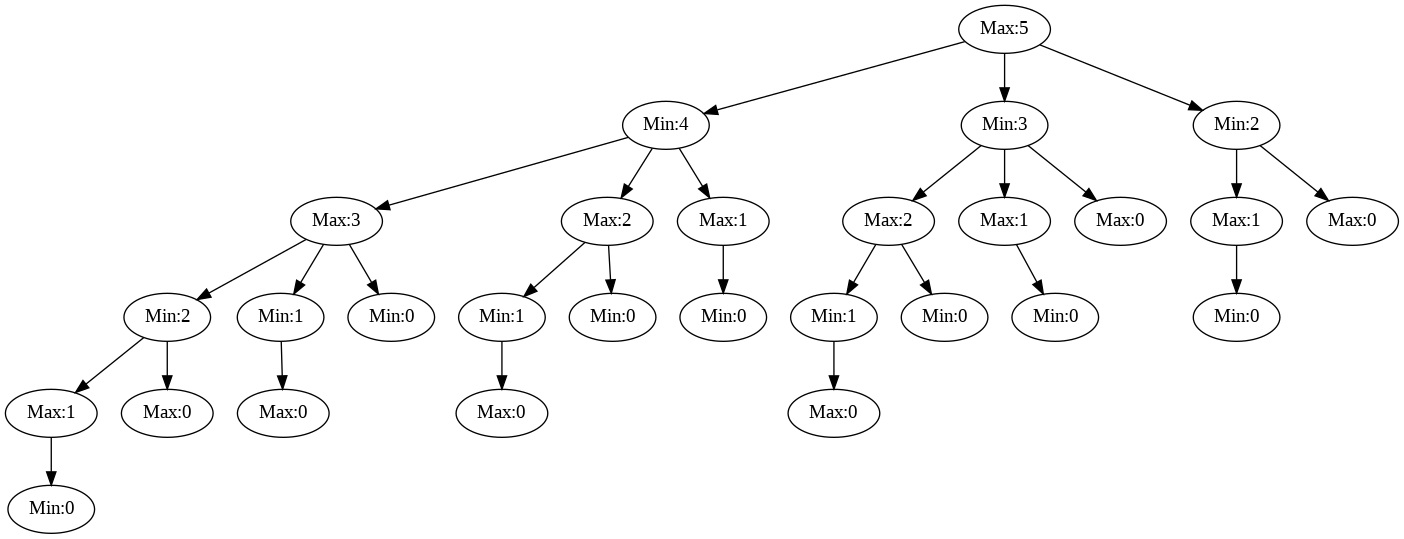

In [ ]:
#The maximum number of objects that each player can remove
max_items_per_turn=3

#The number of initial objects
initial_object=5

#Assume that the maximizer starts the game
current_player='Max'

#get the tree
test_tree=Tree(max_items_per_turn)
test_tree_dict=test_tree.construct_tree(initial_object,current_player)

#tree visualization
test_tree.export_tree(test_tree_dict,is_score_tree=False,tree_name="tree_test")
Image('tree_test.png',width=1000)

### **Task1: Implement minimax**

>  *In this task, you will implement **only** `minimax` and `max_move` functions. Please ensure that you have addressed all of the [TODO] items  before submission.*

\

**Task 1 [TODO] list :** \

☑️ 　　**[TODO 1]**: Retrieve all possible states and give a score for current node in maximizer's view. \
☑️ 　　**[TODO 2]**: Retrieve all possible states and give a score for current node in minimizer's view.\
☑️ 　　**[TODO 3]**: Get the scores of child nodes and decide the maximizer's action(how many objects to remove).



\

You can refer to the following descriptions for clarification:

1.   `score_leaves` : Give each leaf node a score.
    *   If Max(maximizer) wins, the score will be 1.
    *   If Max loses, the score will be -1.

2.   `check_leaf`: Check whether the input node is a leaf node. 
    *   If the node is a leaf node, return the score we set in the `score_leaves` function.



3.   `minimax`: Retrieve the game tree, giving a score to each node.
    *   If the current node is a Min node: the value is the **minimum** of the children nodes

    *   If the current node is a Max node: the value is the **maximum** of the children nodes

    *   Search the game tree in a Depth-First manner to find the value of the root. Depth-first search is an algorithm for traversing or searching tree data structures. The algorithm starts at the root node and explores as far as possible along each branch before backtracking.


4. `max_action`: Given the scores from `minimax`, the maximizer will remove object(s) that maximize the score.

5. `user_input`: Instead of the minimizer, we will take user inputs to play with the maximizer.

\
You may use `anytree` library when you call the tree.
Please refer to this [link](https://anytree.readthedocs.io/en/2.8.0/api/anytree.node.html).

In [144]:
class Minimax: 
    def score_leaves(self):
        for leaf in self.root.leaves:
            if leaf.current_player=="Max":
                leaf.score=-1
            else:
                leaf.score=1

    def check_leaf(self,node):
        if node.is_leaf:
            return node.score

    def minimax(self,node,current_player):
        scores=[]
        if (score := self.check_leaf(node)) is not None:
            return score

        if node.current_player=="Max":
            '''   
            [TODO 1]
            Get the children of "node".
            Then, get the children's scores.
            Update the value of node.score to the appropriate score.(to visualize the tree)
            Return appropriate value given the player.

            * The value of node.score and return value should be same
            HINT:
            1. You may use "node.children" which returns the children of node
            2. You may call "minimax" function recursively.
            '''
            for child in node.children:
                scores.append(self.minimax(child , "Min"))

            node.score = max(scores)    
            return node.score

        else:
            '''   
            [TODO 2]
            Get the children of "node".
            Then, get the children's scores.
            Update the value of node.score to the appropriate score.(to visualize the tree)
            Return appropriate value given the player.

            * The value of node.score and return value should be same

            HINT:
            1. The code will be similar to the above [TODO].

            '''
            for child in node.children:
                scores.append(self.minimax(child , "Max"))

            node.score = min(scores)    
            return node.score          

class Nim(Minimax): # Why Nim takes Minimax? What's the benefit? => You can refer to "Appendix - Python Inheritance" section in this notebook.
    def __init__(self, max_items_per_turn,root,initial_object,user_first):
        super().__init__() # Get fucntions and properties of Minimax. Now, you can call them using "self.". (e.g., self.score_leaves())
        self.root=root
        self.initial_object=initial_object
        self.user_first=user_first

    def max_action(self,node):
        scores=[]
        new_states=[]

        '''   
        [TODO 3]
        Get the children of "node".
        Get a score of each child.

        HINT:
        1. You may use "node.children" which returns the children of node
        2. You may call "minimax" function to get a score of each child.
        '''

        for child in node.children:
                new_states.append(child.object_state)            
                scores.append(self.minimax(child, "Min"))
        
        return node.children[scores.index(max(scores))]


    def user_input(self,node):
        num_remove=int(input("Enter the number of objects to remove:"))
        for i in node.children:
            if i.object_state==node.object_state-num_remove:
                return i
        return node

    def game_manager(self):
        #Score leaf nodes before starting the game
        self.score_leaves()
        current_node=self.root

        for i in range(1,self.initial_object+1):
            if i==1:print(f"Initial Object:{self.initial_object}")
            #User turn
            if (i+self.user_first)%2==0:
                old_node=current_node
                print(old_node)
                #keep requesting user input until the user enters an appropriate value
                while old_node==current_node:
                    current_node=self.user_input(current_node)
                    if old_node == current_node:
                        print("wrong input!")
                    else:
                        print(f"USER | Removed {old_node.object_state-current_node.object_state}, Remaining objects: {current_node.object_state}")

                if current_node.object_state==0:
                    print('User win')
                    break

            #Program turn
            else:
                old_node=current_node
                print("old_node:", old_node.object_state)
                current_node=self.max_action(current_node)
                print(old_node.object_state, current_node.object_state)
                print(old_node.object_state - current_node.object_state)
                print(f"PROGRAM | Removed {old_node.object_state-current_node.object_state}, Remaining objects: {current_node.object_state}")
                
                if current_node.object_state==0:
                    print('Program win')
                    break

#### **Test 1: Play game**
Check yourself by playing with the maximizer! Given your choice, are the maximizer's choices expected? You may refer the score tree in Test2. \
You can set `max_items_per_turn`, `user_turn`, and `initial_object` to your own values when you play.

\* Note that if you want to check whether your code is right or not, please don't modify the setting or set them back to their original values after playing. (If you modify the setting, you will see a different score tree in Test 2.)

```
#Original Setting
max_items_per_turn=2
initial_object=5
current_player="Max"
```



In [145]:

from anytree.node.nodemixin import TreeError
from anytree.importer import DictImporter

#game setting
max_items_per_turn=2
initial_object=5
user_first=0     #if you want to start the game first, change this value to 1
current_player="Min" if user_first==1 else "Max"

#tree construction
tree=Tree(max_items_per_turn)
tree_dict=tree.construct_tree(initial_object,current_player)
root = tree.convert_dict_to_tree(tree_dict)

#initialize the game and call the game manager
nim_game=Nim(max_items_per_turn,root,initial_object,user_first)
nim_game.game_manager()

Initial Object:5
old_node: 5
5 3
2
PROGRAM | Removed 2, Remaining objects: 3
AnyNode(current_player='Min', object_state=3, score=1)
Enter the number of objects to remove:2
USER | Removed 2, Remaining objects: 1
old_node: 1
1 0
1
PROGRAM | Removed 1, Remaining objects: 0
Program win


#### **Test 2: Score Tree**
Please run the Test1 code cell before running Test2.

Your tree


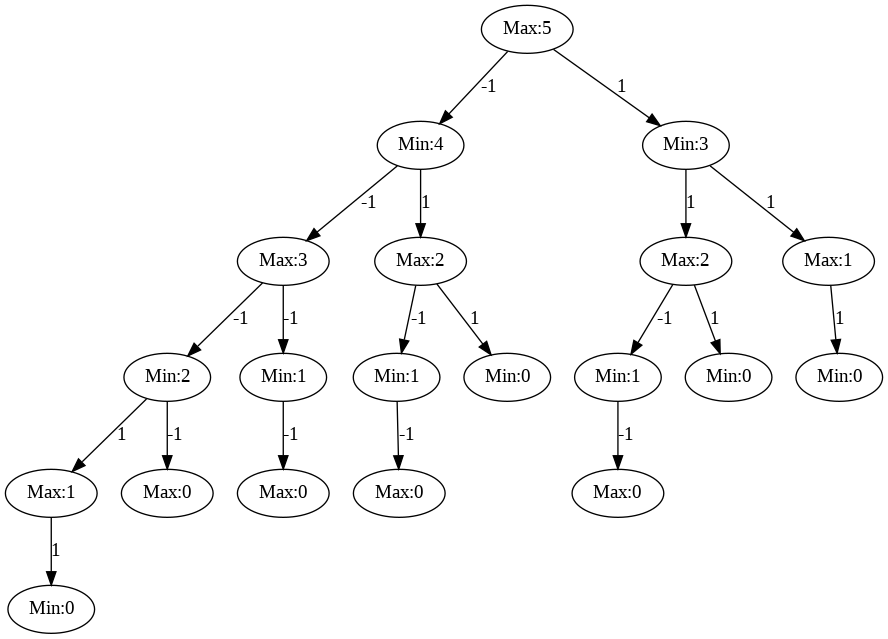

In [146]:
print('Your tree')
tree.export_tree(root,is_score_tree=True,tree_name="tree_score")
Image('tree_score.png',width=700)

Expected tree:


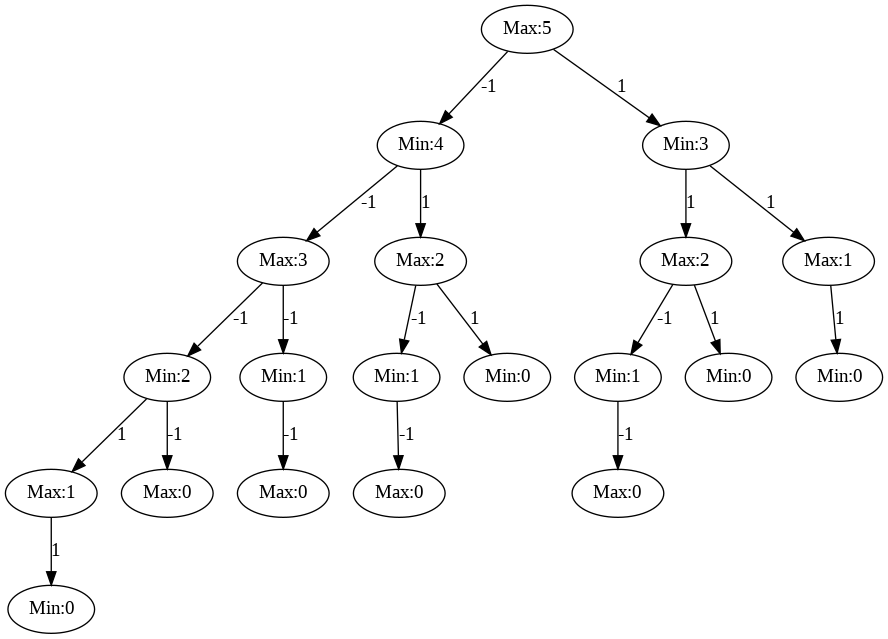

In [60]:
print("Expected tree:")
Image("tree_score_A.png",width=700)

## **Alpha-beta pruning for the Simple-nim game**

### **Task2: Implement Alpha-beta Pruning**


> In this task, you will implement alpha-beta pruning. Check whether you completed all the [TODO] in task 2.


☑️ 　　**[TODO 1]**: Retrieve possible states and get a score of current node in maximizer's view. Then, update alpha if needed. \
☑️ 　　**[TODO 2]**: Retrieve possible states and get a score of current node in minimizer's view. Then, update beta if needed. \
☑️ 　　**[TODO 3]**: Cut off unnecessary nodes based on the alpha and beta.



In [156]:
class Minimax_pruning(Minimax):
    def __init__(self,root):
        super().__init__() # get the functions and properties of parent class(Minimax)
        self.root=root

    #   We set alpha and beta to -1 and 1, respectively instead of -inf and inf
    def minimax_pruning(self, node, current_player, alpha=-1, beta=1):
        if (score := self.check_leaf(node)) is not None:
            return score

        scores = []
        for child in node.children:
          if node.current_player == "Max":
              score = self.minimax_pruning(child , "Min", alpha, beta)
              scores.append(score)
              alpha = max(alpha, score)
              node.score = max(scores)
              if alpha >= beta:
                break;
          else:
              score = self.minimax_pruning(child , "Max", alpha, beta)
              scores.append(score)
              beta = min(beta, score)
              node.score = min(scores)       
              if alpha >= beta:
                break;                    

        return node.score



### Test: Score tree

Your tree:


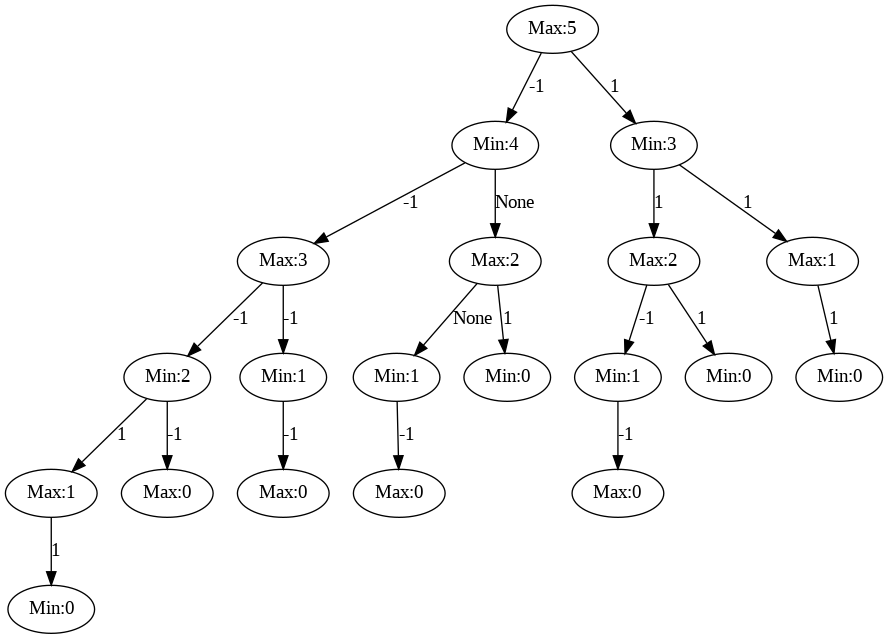

In [159]:
#tree setting
max_items_per_turn=2
initial_object=5
current_player="Max"

#tree construction
tree_pr=Tree(max_items_per_turn)
tree_dict=tree_pr.construct_tree(initial_object,current_player)
root_pr=tree_pr.convert_dict_to_tree(tree_dict)

#initialize minimax pruning
minimax_pr=Minimax_pruning(root_pr)
#score leaf nodes
minimax_pr.score_leaves()
#run 'minimax + alpha-beta pruning' algorithm
minimax_pr.minimax_pruning(root_pr,current_player)

#export tree
tree_pr.export_tree(root_pr,is_score_tree=True,tree_name="tree_score_pruning")

print("Your tree:")
Image("tree_score_pruning.png", width=700)

Expected tree:


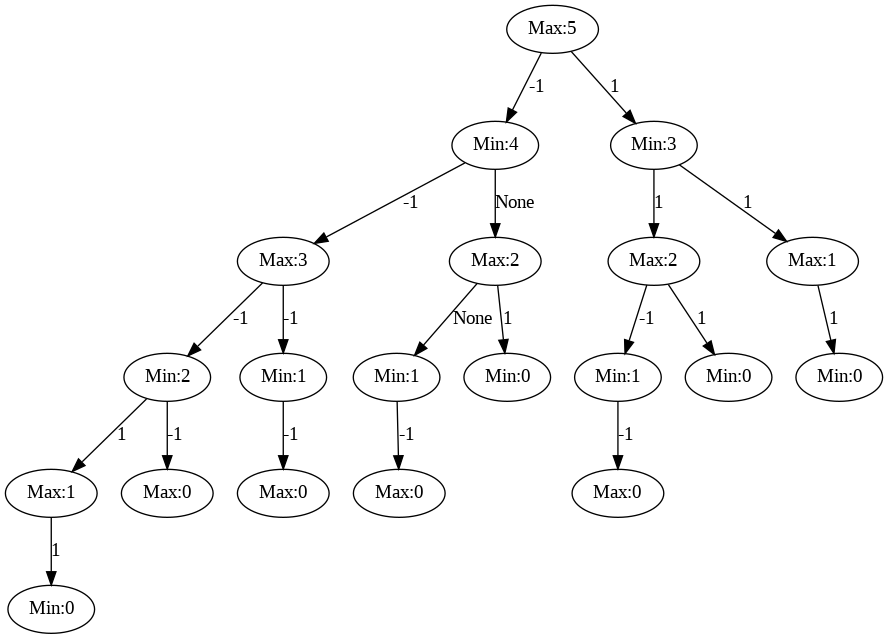

In [158]:
print("Expected tree:")
Image("tree_score_pruning_A.png",width=700)

##**Appendix**

### **Python Inheritance**

In this lab, you will begin by implementing the general Minimax algorithm. Following this, you will repurpose the algorithm to construct the Simple-Nim game and apply Alpha-Beta Pruning. This can be accomplished by simply inheriting the appropriate functions and properties

**Inheritance** allows us to define a class that inherits all the methods and properties from another class.

**Parent class** is the class being inherited from, also called base class.

**Child class** is the class that inherits from another class, also called derived class.

In our case, `Minimax` is a parent class while `Nim` and `Minimax_pruning` are child classes.

[Python Inheritance](https://www.w3schools.com/python/python_inheritance.asp)
